In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from IPython.display import Markdown as md
from arr2ltx import convert2latex, to_latex

import estimator as e
import math

In [2]:
meas_var = 4.
T = 0.2
process_var = 1.
Ae = np.array([[1., T,  0., 0.],
               [0., 1., 0., 0.],
               [0., 0., 1., T ],
               [0., 0., 0., 1.]])
Af = np.array([[1., T, 0., 0.],
               [0., 1., 0., 0.],
               [0., 0., 1., T ],
               [0., 0., 0., 1.]])


H = np.array([[1., 0., 0., 0.],
              [0., 0., 1., 0.]])

Re = np.diag([meas_var, meas_var])
Rf = np.diag([meas_var, meas_var])

Qe = np.diag([process_var, process_var])
Qf = np.diag([process_var, process_var])

G = np.array([[T**2/2, 0],
             [T, 0],
             [0, T**2/2],
             [0, T]])

initialState = np.array([10., 2., 30., 2.])
trueMeas = H@initialState
initialState = initialState[:, np.newaxis]
trueMeas = trueMeas[:, np.newaxis]

max_speed = 4
init_var  = Rf[0, 0]

In [3]:
xs = np.array(['\hat{x_{c}}', '\hat{V_{x}}', '\hat{y_{c}}', '\hat{V_{y}}'])
xs = xs[:, np.newaxis]
zs = np.array(['x^{n}_{c}','y^{n}_{c}'])
zs = zs[:, np.newaxis]
xss = np.array(['x_{c}', 'V_{x}', 'y_{c}', 'V_{y}'])
xss = xss[:, np.newaxis]


As = np.array([[1.,'T',  0., 0.],
               [0., 1.,  0., 0.],
               [0., 0.,  1.,'T'],
               [0., 0.,  0., 1.]])

Gs = np.array([['T^{2}/2', 0],
             ['T', 0],
             [0, 'T^{2}/2'],
             [0, 'T']])

Rs = np.array([['Var_{xy}', 0],
               [0, 'Var_{xy}']])

vss = '\\left( \\frac{Speed_{Max}}{3} \\right)^2'
P0s = np.array([['Var_{xy}', 0,  0., 0.],
               [0., vss,  0., 0.],
               [0., 0.,  'Var_{xy}', 0.],
               [0., 0.,  0., vss]])
P0 = np.diag([init_var, (max_speed/3)**2, init_var, (max_speed/3)**2])
VarProcess  = G@Qe@G.T
Bu = np.zeros(As.shape)

### Один цикл алгоритма линейного фильтра Калмана
Initialize:<br>
$\hspace{8mm} \hat{x}_{0 \mid 0}, P_{0 \mid 0}$
<br>
Predict:<br>
$\hspace{8mm}\hat{x}_{k+1 \mid k}=A_k \hat{x}_{k \mid k}+B_k u_k $<br>
$\hspace{8mm}P_{k+1 \mid k}=A_k P_{k \mid k} A_k^T+G_k Q_k G_k^T $<br>
$\hspace{8mm}\hat{z}_{k+1 \mid k}=H_{k+1} \hat{x}_{k+1 \mid k} $<br>
Update:<br>
$\hspace{8mm}S_{k+1}=H_{k+1} P_{k+1 \mid k} H_{k+1}^T+R_{k+1}$<br>
$\hspace{8mm}K_{k+1}=P_{k+1 \mid k} H_{k+1}^T S_{k+1}^{-1}$<br>
$\hspace{8mm}\hat{x}_{k+1 \mid k+1}=\hat{x}_{k+1 \mid k}+K_{k+1}\left(z_{k+1}-\hat{z}_{k+1 \mid k}\right)$<br>
$\hspace{8mm}P_{k+1 \mid k+1}=P_{k+1 \mid k}-K_{k+1} S_{k+1} K_{k+1}^T$<br>


Литература:
1. Multitarget-Multisensor Tracking: Principles and Techniques. Y. Bar-Shalom; X. Rong-Li, page 257 [\[1\]](multitarget-multisensor-tracking.pdf)
2. Fundamentals of Kalman Filtering—A Practical Approach, Second Edition. Paul Zarchan. [\[2\]](Fundamentals-of-Kalman-Filtering.pdf)

## Формализация задачи   
Расмотрим пример использования фильтра Калмана для кинематической модели движения второго порядка <br> (с компонетами координат и скоростью) в каждой из двух декартовых координат. Вектор оценки будет из себя представлять:<br>
<p style="text-align: center;">$\hat{x}=${{ Math(to_latex(xs)) }}</p>
где $\hat{x}_{c},\hat{y}_{c}$-декартовы координаты, $\hat{V}_{x},\hat{V}_{y}$-проекции скорости декартовых координат.<br><br>

Вектор наблюдений будет из себя представлять:<br>
<p style="text-align: center;"> $\hspace{5mm}z$={{ Math(to_latex(zs)) }}</p>
где $x^{n}_{c},y^{n}_{c}$-декартовы координаты c добавлением шумов измерения, в моделировании зададим дисперсию шумов измерений раным $Var_{xy}$ = 4.0 $m^{2}$<br><br>

### Определим основные соотношения и матрицы.
Зададим что темп поступления входных данных $T$=0.2 секунды. Тогда матрица перехода состояний будет равна:
<p style="text-align: center;"> $A_{k}$ = {{ Math(to_latex(As)) }} = {{ Math(to_latex(Af)) }}</p><br>

Изменения скорости моделируются как кусочно-постоянные ускорения белого шума с нулевым средним. Таким образом, матрица усиление шума равна:<br>
<p style="text-align: center;"> $G_{k}$ = {{ Math(to_latex(Gs)) }} = {{ Math(to_latex(G)) }}</p><br><br>

Дисперсии шума процесса зададим:
<p style="text-align: center;"> $Q_{k}$={{ Math(to_latex(Qf)) }}</p><br><br>
«Маленькое» $Q_{k}$ дает движение «почти с постоянной скоростью».

Определим что не будет сигналов управления, т.е:
<p style="text-align: center;"> $B_{k}u_{k}$ = {{ Math(to_latex( Bu )) }}</p><br>

Матрица перехода между вектором оценкой и измерениями равна:
<p style="text-align: center;"> $H_{k+1}$={{ Math(to_latex(H)) }}</p><br>

Ковариционная матрица измерений будет равна:
<p style="text-align: center;"> $R_{k+1}$={{ Math(to_latex(Rs)) }}={{ Math(to_latex(Rf)) }}</p><br>

Вектор состояния будем инициализировать первым измерением как:
<p style="text-align: center;"> $\hat{x}_{0|0}=H^{T}z_{0}$ = {{ Math(to_latex(H.T)) }}{{ Math(to_latex(trueMeas)) }} = {{ Math(to_latex(H.T@trueMeas)) }}</p><br>

Ковариционную матрицу оценки будем задавать как:
<p style="text-align: center;"> $\hat{P}_{0|0}$ = {{ Math(to_latex(P0s)) }} = {{ Math(to_latex(P0)) }}</p><br>
где $Speed_{Max} = 4\frac{m}{s}$ - максимальная скорость наблюдаемого обьекта;

In [4]:
def make_true_data(x0):
    X = np.zeros((x0.shape[0], 20))
    X[:, 0] = x0.T
    for i in range(X.shape[1]-1):
        X[:, i+1] = np.squeeze(Ae @ X[:, i][:, np.newaxis])
    return X

X=make_true_data(initialState)

## Моделирование

Для проверки правильности реализации алгоритма и сбора статистики результатов фильтрации линейного фильтра Калмана  выполним моделирование. Моделирование будет состоять следующих этапов: 
1. Получение траектории движения наблюдаемого обьекта; <br>
2. Из трактории движения получим измерения;<br>
3. Фильтрация алгоритом Калмана и построение графика для одной реализации;<br>
4. Повторение пунтков 1-3 и сбор статистики работы по N экспериментам и построеник графиков.

### Получение траектории движения обьекта
$x_{k+1}=A_{k}x_{k}$, $\hspace{5mm}x_{0}$ = {{ Math(to_latex(xss)) }} = {{ Math(to_latex(initialState)) }}
<br>
<br>
$X = ${{ Math(to_latex(X)) }}

In [5]:
def add_process_noise(X, Var):
    Xn = X + np.sqrt(Var) @ np.random.normal(loc=0, scale=1.0, size=(X.shape[0], X.shape[1]))
    return Xn
Xn = add_process_noise(X, VarProcess)

### Добавление шума процесса к реальным данным
$G_{k}Q_{k}G^{T}_{k}$={{ Math(to_latex(G)) }}{{ Math(to_latex(Qe)) }}{{ Math(to_latex(G.T)) }}={{ Math(to_latex(VarProcess)) }}
<br>
<br>
$\hspace{5mm}\sqrt{G_{k}Q_{k}G^{T}_{k}}$={{Math(to_latex(np.sqrt(VarProcess)))}}
<br>
<br>
$
V = \begin{bmatrix}
    v_{11} & v_{12} & \cdots & v_{1n} \\
    v_{21} & v_{22} & \cdots & v_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    v_{m1} & v_{m2} & \cdots & v_{mn}
\end{bmatrix}
\quad \text{где} \quad v_{ij} \sim N(0, 1)$, пусть матрицы $X$ и $V$ имеют одинаковые размеры
<br>
<br>
$X^{n}=X+\sqrt{G_{k}Q_{k}G^{T}_{k}}V$ = {{ Math(to_latex(Xn)) }}



In [6]:
def make_meas(X, R):
    Z = H @ X
    Zn = Z + np.sqrt(R) @ np.random.normal(loc=0, scale=math.sqrt(1.0), size=(Z.shape[0], Z.shape[1]))
    return Zn
Z  = H@Xn
Zn = make_meas(Xn, Re)

### Получение измерений
$H_{k}X$={{ Math(to_latex(H)) }}{{ Math(to_latex(Xn)) }}
<br>
<br>
={{ Math(to_latex(Z)) }}

$\sqrt{R}=${{ Math(to_latex(np.sqrt(Re))) }}
<br>
<br>
$
V = \begin{bmatrix}
    v_{11} & v_{12} & \cdots & v_{1n} \\
    v_{21} & v_{22} & \cdots & v_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    v_{m1} & v_{m2} & \cdots & v_{mn}
\end{bmatrix}
\quad \text{где} \quad v_{ij} \sim N(0, 1)$, где матрицы $Z$ и $V$ имеют одинаковые размеры
<br>
<br>
$Z=H_{k}X+\sqrt{R}V$ = {{ Math(to_latex(Zn)) }}


### Построение графиков оценки по одной реализации

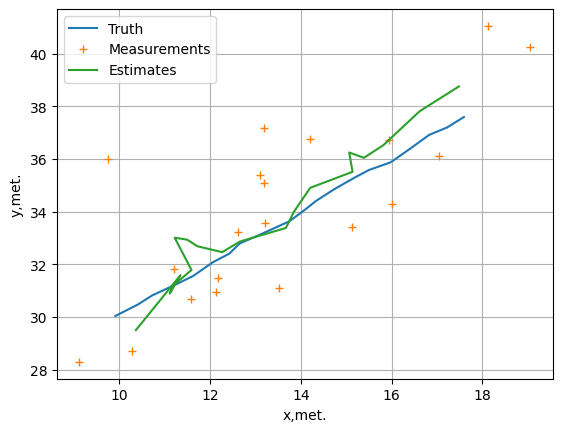

In [7]:
def make_kalman_filter(measurement):
    x0 = H.T @ measurement
    kf = e.Kf(x0, P0, Af, Qf, G, H, Rf)
    return kf


def step(Z, make_estimator):
    estimator = make_estimator(Z[:, 0][:, np.newaxis])
    est = np.zeros((initialState.shape[0], Z.shape[1]-1))

    for col in range(est.shape[1]):
        z = Z[:, col + 1]
        xp, _ = estimator.predict()
        m1 = np.array([z[0], z[1]])
        xc, _ = estimator.correct(m1.T)
        est[:, col] = np.squeeze(xc[:])

    return est

est=step(Zn, make_kalman_filter)

plt.figure()
plt.plot(Xn[0, :], Xn[2, :], label='Truth')
plt.plot(Zn[0, :], Zn[1, :], label='Measurements', linestyle='', marker='+')
plt.plot(est[0, :], est[2, :], label='Estimates')
plt.xlabel('x,met.')
plt.ylabel('y,met.')
plt.grid(True)
plt.legend()
plt.show()

### Сбор статистики по наботу экспериментов
$$
Std_{k}=\sqrt{\frac{\sum_{i=1}^N {(\hat{x}_{k}^{i}-x_{k}^{i})}^2}{N}}
$$
где $i$ - номер эксперимента; <br> $k$ - номер шага фильтра; <br> $N$ - количество экспериментов; <br>
$x_{k}^{i}$ - истинное значение;<br>
$\hat{x}_{k}^{i}$ - оценка;
***

100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 2659.16it/s]


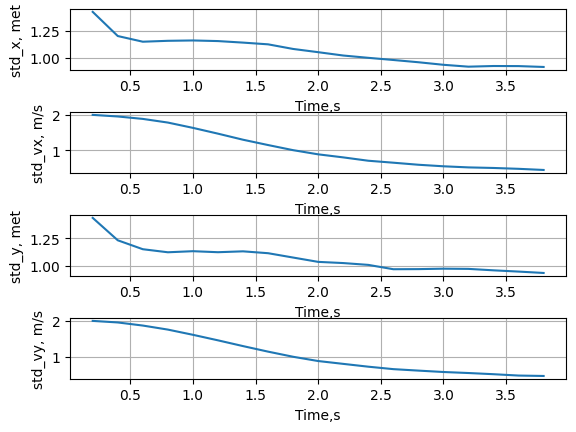

In [8]:
def calc_err(X, make_estimator):
    QQ = G@Qe@G.T
    Xn = add_process_noise(X, QQ)
    Zn = make_meas(Xn, Re)
    est = step(Zn, make_estimator)
    err = est - Xn[:, 1:]
    return err

from tqdm import tqdm

def calc_std_err(X, make_estimator):
    num_iterations = 2000
    var_err = np.zeros((X.shape[0], X.shape[1]-1))

    for i in tqdm(range(num_iterations)):
        err = calc_err(X, make_estimator)
        var_err += err ** 2

    var_err /= num_iterations
    return np.sqrt(var_err)

std_err = calc_std_err(X, make_kalman_filter)

plt.figure()
plt.subplot(4, 1, 1)
plt.plot((np.arange(len(std_err[0, :]))+1)*T, std_err[0, :].T)
plt.xlabel('Time,s')
plt.ylabel('std_x, met')
plt.grid(True)
plt.subplot(4, 1, 2)
plt.plot((np.arange(len(std_err[1, :]))+1)*T, std_err[1, :].T)
plt.grid(True)
plt.xlabel('Time,s')
plt.ylabel('std_vx, m/s')
plt.subplot(4, 1, 3)
plt.plot((np.arange(len(std_err[2, :]))+1)*T, std_err[2, :].T)
plt.grid(True)
plt.xlabel('Time,s')
plt.ylabel('std_y, met')
plt.subplot(4, 1, 4)
plt.plot((np.arange(len(std_err[3, :]))+1)*T, std_err[3, :].T)
plt.grid(True)
plt.xlabel('Time,s')
plt.ylabel('std_vy, m/s')
plt.subplots_adjust(wspace=8.0, hspace=0.7)
plt.show()